<a href="https://colab.research.google.com/github/lcbjrrr/lcbjrrr/blob/master/Grafico_Phillip_Covid19_em_cidades_brasileiras_(11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de média, mínimo e máximo do número de cados de covid19 para cada cidade



In [ ]:
#Número de casos de covid19 relacionados à meses
import pandas as pd
#carrega o arquivo csv e convert para dataFrame
df1 = pd.read_csv('brazil_covid19_cities.csv')
#Agrupa cidades (name) construindo a média, mínimo e máximo. 
#Como uma cidade, como SP, pode aparecer várias vezes com casos registrados,
#em dias diferentes, assim é posível realizar o cálculo estatístico sobre a mesma
df2 = df1.groupby('name').agg({'cases': ['mean', 'min', 'max']}).sort_values(by='name',ascending=False).head(20)
df2

cases               
                               mean    min     max
name                                              
Óleo                       3.333333    1.0     7.0
Óbidos                  1363.266667  292.0  2333.0
Érico Cardoso              1.065934    0.0     3.0
Ângulo                    26.955556    1.0    54.0
Áurea                     12.355556    1.0    20.0
Álvaro de Carvalho         8.933333    3.0    17.0
Álvares Machado          144.100000   62.0   226.0
Álvares Florence          36.188889    8.0    59.0
Águia Branca             263.736264   72.0   397.0
Águas de São Pedro        29.111111    8.0    49.0
Águas de Santa Bárbara    15.333333    7.0    24.0
Águas de Lindóia         107.522222   44.0   164.0
Águas de Chapecó          36.333333   25.0    51.0
Águas da Prata            25.966667    2.0    61.0
Águas Vermelhas           33.252747   21.0    50.0
Águas Mornas              90.511111   16.0   154.0
Águas Lindas de Goiás   2116.307692  774.0  3477.0
Águas Frias               31.766667    1.0    91.0
Águas Formosas           218.373626   12.0   308.0
Águas Belas              611.277778  386.0   787.0

#Gráficos com sumarização de quantidade de casos e mortes cumulativos de covid19 por mês
Nos dois próximos códigos, desconsiderando o mês de outubro de 2020, pelo fato dos dados cumulativos estarem mais baixos que os meses anteriores, provelmente porque quando foi criado o dataset alguns munícipios ainda não tinham liberados dados deste último mês.
Assim, considerando apenas os meses de julho, agosto e setembro, percebe-se que a quantidade de infectados e mortes diminuiram drasticamente com o passar dos meses. Além disso o percentual de mortes em relação ao número de infectados caiu. Este fator pode estar relacionado a novos métodos descobertos, de combate a covid19.

Desconsirando a primeira barra, referente à outubro, pelos motivos já mencionados, percebe-se que com os passar dos meses a diferença entre as barras ficam cada vez menor, indicando diminuição de novos casos e novas mortes em comparação aos meses.

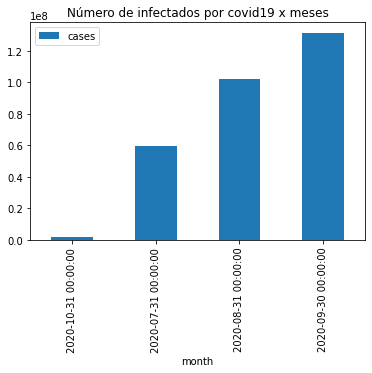

In [ ]:
#Número de casos de covid19 relacionados à meses
import pandas as pd
#carrega o arquivo csv e convert para dataFrame
df1 = pd.read_csv('brazil_covid19_cities.csv')
#Renomeia a coluna data para month
df2 = df1.rename({'date': 'month'}, axis='columns')
#Convert dados do tipo string para datetime na coluna month
df2['month'] = pd.to_datetime(df2['month'])
#Faz sumarização com numero de casos totais de covid19 para cada, nomeando 
#a nova coluna de cases
df2.set_index('month',inplace=True)
df3 = df2['cases'].resample('m').sum().sort_values().reset_index(name ='cases')
#Plota gráfico do número de cados em cada mês (desconsidre outubro)
df4 = df3.plot.bar(x='month', y='cases', title="Número de infectados por covid19 x meses", rot=90)
df4

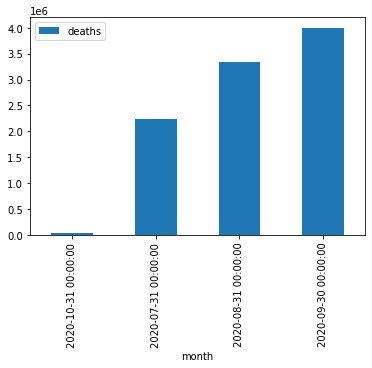

In [ ]:
#Código similar ao código anterior, porém para número de mortes por convid19
import pandas as pd
#carrega o arquivo csv e convert para dataFrame
df1 = pd.read_csv('brazil_covid19_cities.csv')
#Renomeia a coluna data para month
df2 = df1.rename({'date': 'month'}, axis='columns')
#Convert dados do tipo string para datetime na coluna month
df2['month'] = pd.to_datetime(df2['month'])
#Faz sumarização com numero de casos totais de covid19 para cada, nomeando 
#a nova coluna de cases
df2.set_index('month',inplace=True)
df3 = df2['deaths'].resample('m').sum().sort_values().reset_index(name ='deaths')
#Plota gráfico do número de cados em cada mês (desconsidre outubro)
df4 = df3.plot.bar(x='month', y='deaths', title="Número de mortes por covid19 x meses",  rot=90)
df4

#Gráfico com número de casos e mortes totais para cada Estado brasileiros até outubro de 2020.

Percebe-se claramente a disparidade da pandemia em SP, provavelmente por ser muito populoso e um centro econômico e urbano brasileiro.

Percebe-se que o número de mortes em relação aos infectados em SP é muito menor em que alguns Estados, como no RJ, provavelmente por investimentos maiores no combate à pandemia.

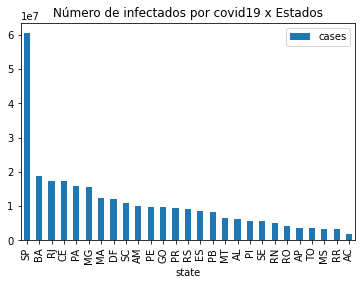

In [ ]:
#Gráfico que Relaciona Estados e casos
import pandas as pd
#Importa o dataset csv
df = pd.read_csv('brazil_covid19_cities.csv')
#Agrupa todos estados com mesmos nomes
df1 = df.groupby('state')
#Selecion a columa cases do agrupamento, somas os valores para cada Estado, 
#e faz a ordenação do número de casos do maior para o menor e
# cria um nome para nova coluna
df2 = df1['cases'].sum().sort_values(ascending=False).reset_index(name ='cases')
#Plota com Estado no eixo x e número de cados multiplicado por 10^7 no eixo y
df3 = df2.plot.bar(x='state', y='cases', title="Número de infectados por covid19 x Estados", rot=90)
df3

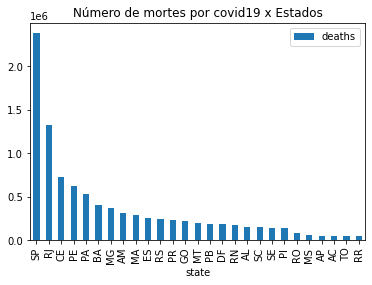

In [ ]:
#Gráfico que Relaciona Estados e mortes
import pandas as pd
#Importa o dataset csv
df = pd.read_csv('brazil_covid19_cities.csv')
#Agrupa todos estados com mesmos nomes
df1 = df.groupby('state')
#Selecion a columa cases do agrupamento, somas os valores para cada Estado, 
#e faz a ordenação do número de casos do maior para o menor e
# cria um nome para nova coluna
df2 = df1['deaths'].sum().sort_values(ascending=False).reset_index(name ='deaths')
#Plota com Estado no eixo x e número de cados multiplicado por 10^7 no eixo y
df3 = df2.plot.bar(x='state', y='deaths', title="Número de mortes por covid19 x Estados",  rot=90)
df3